In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:



! kaggle datasets download giannisgeorgiou/fish-species

100% 1.53G/1.54G [00:15<00:00, 109MB/s]
100% 1.54G/1.54G [00:15<00:00, 107MB/s]


In [ ]:
! unzip fish-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1088.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1089.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-109.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1090.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1091.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1092.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1093.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1094.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1095.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1096.jpg  
  inflating: Species/Training_Set/Tetrapturus belone/tetrapturus_belone-1097.jpg  
  inflating: Species/Training_Set/Tet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import seaborn as sns
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import keras

In [ ]:
train_gen = ImageDataGenerator(featurewise_center= True,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                              zoom_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               preprocessing_function=preprocess_input)


test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_path="/content/Species/Training_Set"
test_path="/content/Species/Test_Set"



train_data=train_gen.flow_from_directory(train_path,
                                        target_size=(200,200),
                                        batch_size=150,
                                        class_mode="categorical"
                                        )     
                                  

val_data=test_gen.flow_from_directory(test_path,
                                        target_size=(200,200),
                                        batch_size=150,
                                        class_mode="categorical"
                                        )


Found 34000 images belonging to 20 classes.
Found 6000 images belonging to 20 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_model = InceptionV3(input_shape=(200,200,3), include_top= False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=20, activation='sigmoid')(X)
model = Model(base_model.input, X)
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7fd3b6ab39d0>>

In [ ]:
my_dict = train_data.class_indices
inv_my_dict = {v: k for k, v in my_dict.items()}
print(inv_my_dict)


{0: 'Anthias anthias', 1: 'Atherinomorus lacunosus', 2: 'Belone belone', 3: 'Boops boops', 4: 'Chlorophthalmus agassizi', 5: 'Coris julis', 6: 'Dasyatis centroura', 7: 'Epinephelus caninus', 8: 'Gobius niger', 9: 'Mugil cephalus', 10: 'Phycis phycis', 11: 'Polyprion americanus', 12: 'Pseudocaranx dentex', 13: 'Rhinobatos cemiculus', 14: 'Scomber japonicus', 15: 'Solea solea', 16: 'Squalus acanthias', 17: 'Tetrapturus belone', 18: 'Trachinus draco', 19: 'Trigloporus lastoviza'}


In [ ]:
t_img , label = train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
def plotImages(img_arr, label):
    for idx ,img in enumerate(img_arr):
        if idx <= 10:
            plt.figure(figsize=(5,5))
            plt.imshow(img)
            plt.title(img.shape)
            plt.axis=False
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


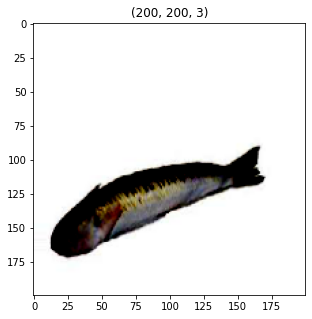

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


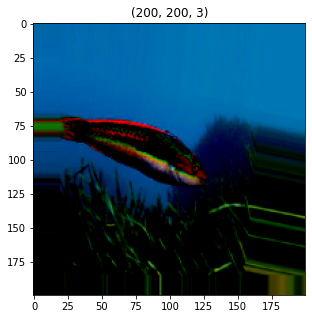

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


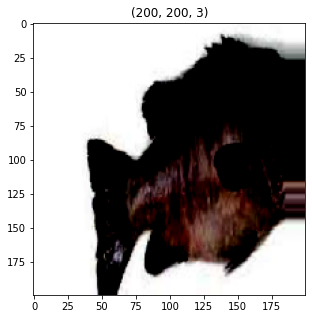

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


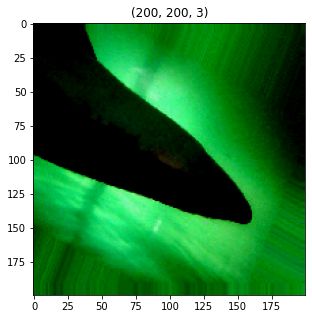

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


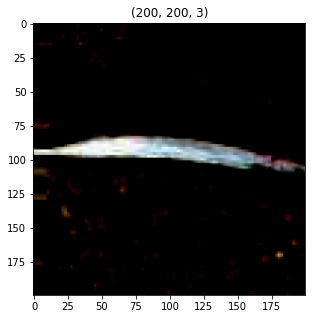

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


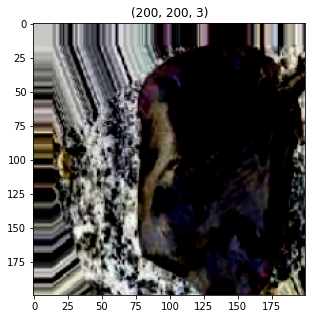

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


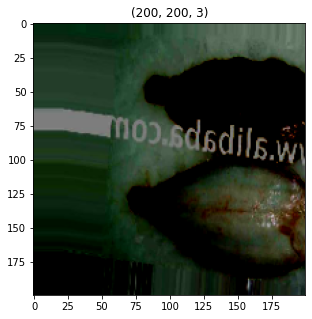

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


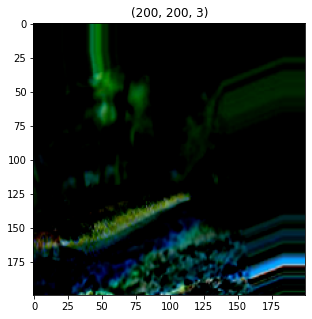

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


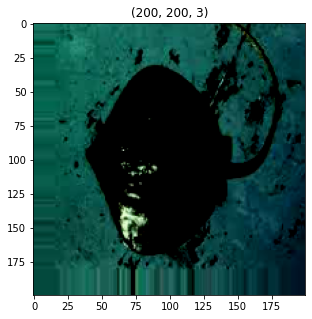

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


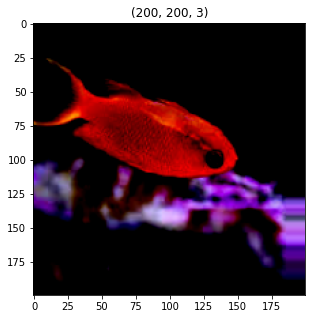

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


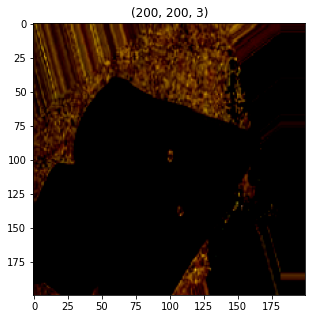

In [ ]:
plotImages(t_img, label)

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
mc = ModelCheckpoint(filepath = "./best_model.h5",
                    mointor='accuracy',
                    verbose=1,
                    save_best_only=True)
es = EarlyStopping(monitor= "accuracy", min_delta=0.01, patience=5,
                  verbose=1)
cb = [mc,es]

In [ ]:
history = model.fit(
    train_data,
    batch_size=150,
    epochs=15,
    validation_data=val_data,
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
  7/227 [..............................] - ETA: 7:20 - loss: 1.9532 - accuracy: 0.0524

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


227/227 [==============================] - 584s 2s/step - loss: 0.2490 - accuracy: 0.6912 - val_loss: 0.0649 - val_accuracy: 0.8390
Epoch 2/15
227/227 [==============================] - 547s 2s/step - loss: 0.0680 - accuracy: 0.8385 - val_loss: 0.0647 - val_accuracy: 0.8587
Epoch 3/15
227/227 [==============================] - 554s 2s/step - loss: 0.0662 - accuracy: 0.8621 - val_loss: 0.0528 - val_accuracy: 0.8933
Epoch 4/15
227/227 [==============================] - 547s 2s/step - loss: 0.0645 - accuracy: 0.8778 - val_loss: 0.0544 - val_accuracy: 0.9015
Epoch 5/15
227/227 [==============================] - 541s 2s/step - loss: 0.0637 - accuracy: 0.8898 - val_loss: 0.0702 - val_accuracy: 0.8818
Epoch 6/15
227/227 [==============================] - 540s 2s/step - loss: 0.0661 - accuracy: 0.8930 - val_loss: 0.0692 - val_accuracy: 0.8943
Epoch 7/15
227/227 [==============================] - 542s 2s/step - loss: 0.0724 - accuracy: 0.8927 - val_loss: 0.0813 - val_accuracy: 0.8843
Epoch 8/15

In [ ]:
from tensorflow.keras.models import save_model
model.save("/content/drive/MyDrive/Species_Classfication/Species_Classfier.h5")

In [ ]:
from tensorflow.keras.models import load_model

classfier= load_model("/content/Species_Classfier.h5")

In [ ]:
path ="/content/download (1).jpg"
img = load_img(path, target_size=(200,200))
i= img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape
pred = np.argmax(model.predict(input_arr))
plt.imshow(input_arr[0])
key = (list(my_dict.keys())[list(my_dict.values()).index(pred)])

plt.title(key)
plt.show()